In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
cancer = pd.read_excel('cancer patient data sets.xlsx', header = None)


In [3]:
#To use the data we will need to fix the header
new_header=cancer.iloc[0]#Reads the first row which contains the headers
cancer=cancer[1:]#Slices the rest of the data frame from header
cancer.columns=new_header#Sets the header labels
cancer.info()
cancer.head()
cancer_label=cancer.columns
for label in cancer_label:
    print('***', label,'labels:',cancer[label].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   object
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   object
 4   Alcohol use               1000 non-null   object
 5   Dust Allergy              1000 non-null   object
 6   OccuPational Hazards      1000 non-null   object
 7   Genetic Risk              1000 non-null   object
 8   chronic Lung Disease      1000 non-null   object
 9   Balanced Diet             1000 non-null   object
 10  Obesity                   1000 non-null   object
 11  Smoking                   1000 non-null   object
 12  Passive Smoker            1000 non-null   object
 13  Chest Pain                1000 non-null   object
 14  Coughing of Blood       

<AxesSubplot:xlabel='Level', ylabel='count'>

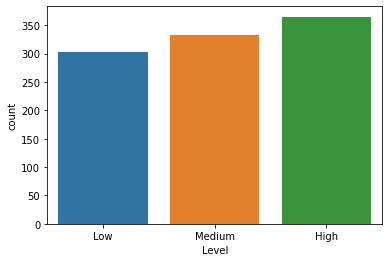

In [4]:
sns.countplot(x=cancer["Level"])

<AxesSubplot:xlabel='Level', ylabel='count'>

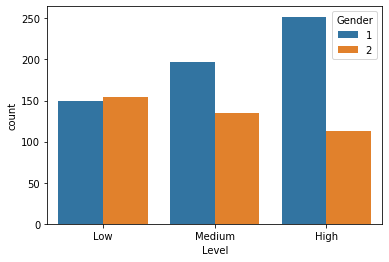

In [5]:
sns.countplot(data=cancer, x="Level", hue="Gender")

<AxesSubplot:xlabel='Passive Smoker', ylabel='Alcohol use'>

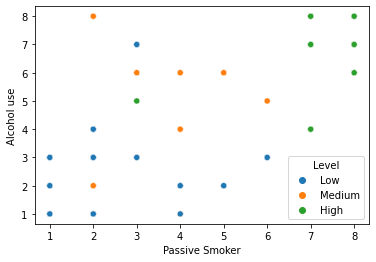

In [7]:
sns.scatterplot(data=cancer, x="Passive Smoker", y="Alcohol use", hue="Level")

<AxesSubplot:xlabel='Smoking', ylabel='Alcohol use'>

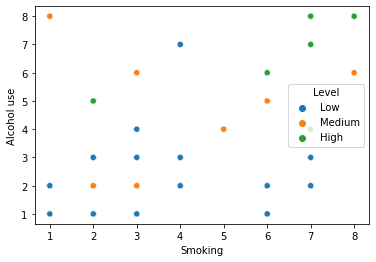

In [9]:
sns.scatterplot(data=cancer, x="Smoking", y="Alcohol use", hue="Level")

<AxesSubplot:xlabel='Level', ylabel='Smoking'>

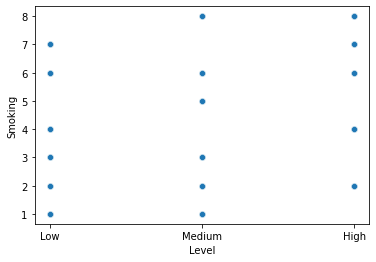

In [10]:
sns.scatterplot(data=cancer, x="Level", y="Smoking")

<AxesSubplot:xlabel='Level', ylabel='Passive Smoker'>

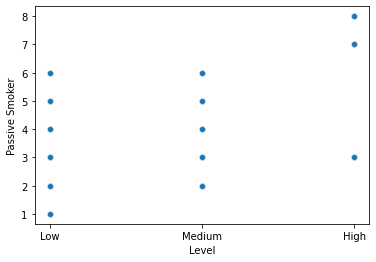

In [11]:
sns.scatterplot(data=cancer, x="Level", y="Passive Smoker")

<AxesSubplot:xlabel='Level', ylabel='OccuPational Hazards'>

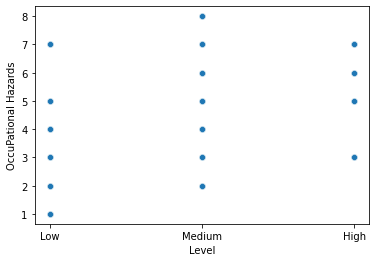

In [11]:
sns.scatterplot(data=cancer, x="Level", y="OccuPational Hazards")

<AxesSubplot:xlabel='Obesity', ylabel='Balanced Diet'>

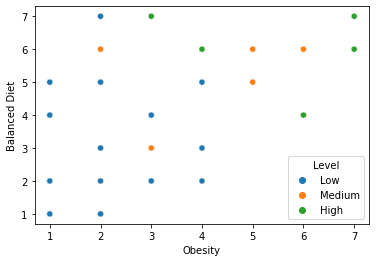

In [13]:
sns.scatterplot(data=cancer, x="Obesity", y="Balanced Diet", hue="Level")

<AxesSubplot:xlabel='Coughing of Blood', ylabel='Level'>

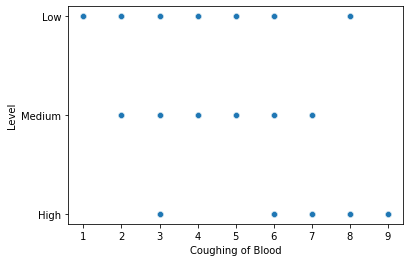

In [15]:
sns.scatterplot(data=cancer, x="Coughing of Blood", y="Level")

<AxesSubplot:xlabel='Level', ylabel='Age'>

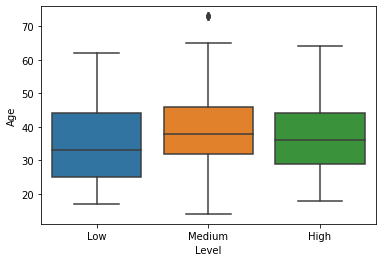

In [6]:
sns.boxplot(data=cancer, x="Level", y="Age")

In [7]:
from sklearn.feature_selection import SelectKBest #Feature Selector
from sklearn.feature_selection import f_classif #F-ratio statistic for categorical values

<AxesSubplot:xlabel='Score', ylabel='Feature'>

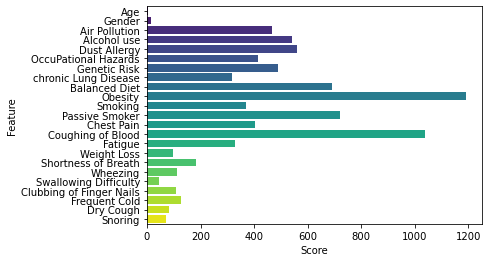

In [8]:
#Feature Selection
X=cancer.drop(['Level','Patient Id'], axis=1)
Y=cancer['Level']
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')

In [9]:
#Selection method
selection=featureScores[featureScores['Score']>=200]#Selects features that scored more than 200
selection=list(selection['Feature'])#Generates the features into a list
selection.append('Level')#Adding the Level string to be used to make new data frame
new_cancer=cancer[selection] #New dataframe with selected features
new_cancer.head() #Lets take a look at the first 5

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
1,2,4,5,4,3,2,2,4,3,2,2,4,3,Low
2,3,1,5,3,4,2,2,2,2,4,2,3,1,Medium
3,4,5,6,5,5,4,6,7,2,3,4,8,8,High
4,7,7,7,7,6,7,7,7,7,7,7,8,4,High
5,6,8,7,7,7,6,7,7,8,7,7,9,3,High


In [10]:
new_cancer['Level'] = new_cancer['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})

C:\Users\avina\AppData\Local\Temp/ipykernel_27092/2709288745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cancer['Level'] = new_cancer['Level'].map({'Low': 1, 'Medium': 2, 'High': 3})


In [11]:
X = np.array(new_cancer.iloc[:,:13])
print("X is\n", X)
print(X.shape)
## Set y to the label. Check the shape!
y = np.array(new_cancer.iloc[:,13:]).T
y = np.array([y]).T
print("y is\n", y)

X is
 [[2 4 5 ... 2 4 3]
 [3 1 5 ... 2 3 1]
 [4 5 6 ... 4 8 8]
 ...
 [4 5 6 ... 4 8 8]
 [6 8 7 ... 7 9 3]
 [6 5 6 ... 4 8 8]]
(1000, 13)
y is
 [[[1]]

 [[2]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[1]]

 [[1]]

 [[2]]

 [[2]]

 [[3]]

 [[3]]

 [[2]]

 [[3]]

 [[1]]

 [[2]]

 [[2]]

 [[3]]

 [[3]]

 [[2]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[2]]

 [[2]]

 [[2]]

 [[3]]

 [[2]]

 [[3]]

 [[3]]

 [[2]]

 [[1]]

 [[1]]

 [[2]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[3]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[3]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[1]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[3]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[3]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[2]]

 [[3]]

 [[3]]

 [[3]]

 [[2]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[2]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 [[3]]

 

In [12]:
#Creating one hot labels for y
n = len(new_cancer)
temp = y
one_hot_labels = np.zeros((n, 3))
print(one_hot_labels)
for i in range(n):
    one_hot_labels[i, temp[i]-1] = 1    

y = one_hot_labels
print("y after one-hot-encoding is\n",y)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
y after one-hot-encoding is
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [13]:
#Splitting the data into train and test with 33% test size and randomstate 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test label is {y_test.shape}")

Shape of train set is (670, 13)
Shape of test set is (330, 13)
Shape of train label is (670, 3)
Shape of test label is (330, 3)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=3

In [16]:
#Create a sequencial model in Keras
import tensorflow as tf
model = tf.keras.models.Sequential()

In [17]:
#Add the first hidden layer
model.add(keras.layers.Dense(64,         #Number of nodes
                        input_shape=(13,), #Number of input variables
                        name='Hidden-Layer-1', #Logical name
                        activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(32,
                              name='Hidden-Layer-2',
                              activation='relu'))

In [18]:
#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

In [19]:
#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
#Print the model meta-data
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 64)                896       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 32)                2080      
                                                                 
 Output-Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


In [21]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=10
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")


Training Progress:
------------------------------------


In [22]:
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

Epoch 1/10
34/34 [==============================] - 0s 5ms/step - loss: 0.7551 - accuracy: 0.6362 - val_loss: 0.5235 - val_accuracy: 0.7313
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8004 - val_loss: 0.3919 - val_accuracy: 0.7463
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8750 - val_loss: 0.3122 - val_accuracy: 0.8881
Epoch 4/10
34/34 [==============================] - 0s 1ms/step - loss: 0.2461 - accuracy: 0.9160 - val_loss: 0.2547 - val_accuracy: 0.9104
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.9179 - val_loss: 0.2258 - val_accuracy: 0.9328
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 0.1654 - accuracy: 0.9496 - val_loss: 0.1707 - val_accuracy: 0.9851
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9720 - val_loss: 0.1364 - val_accuracy: 1.0000
Epoch 8/10
34/34 [==


Accuracy during Training :
------------------------------------


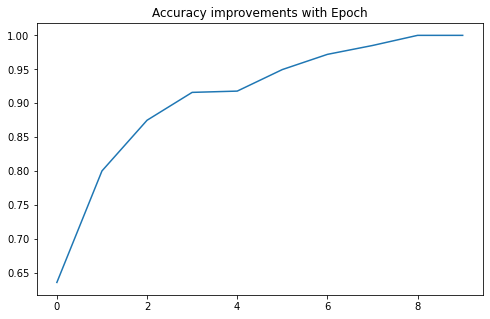

In [23]:
print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [24]:
#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,y_test)


Evaluation against Test Dataset :
------------------------------------
11/11 [==============================] - 0s 803us/step - loss: 0.0629 - accuracy: 1.0000


[0.06294412165880203, 1.0]